In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from pulp import *
import time

In [16]:
class box:
    def __init__(self,dim):
        self.dimensioni=dim

    def getW(self):
        return self.dimensioni[0]

    def getD(self):
        return self.dimensioni[1]


In [17]:
class cargo:
    def __init__(self,dim):
        self.dimensioni=dim

    def getW(self):
        return self.dimensioni[0]

    def getD(self):
        return self.dimensioni[1]



In [18]:
def plotSolution(solution, camion, packages):
    boxes = []

    width = [p.dimensioni[0] for p in packages]
    depth = [p.dimensioni[1] for p in packages]
    
    #bin
    container = Rectangle((0,0), camion.dimensioni[1], camion.dimensioni[0], facecolor='white')
    boxes.append(container)

    #items
    for a in solution:
        w = width[a[2]] if a[3] == 0 else depth[a[2]]
        d = depth[a[2]] if a[3] == 0 else width[a[2]]
        box = Rectangle((a[1],a[0]), d, w, facecolor='r')
        boxes.append(box)

    #plot
    facecolors = [b.get_facecolor() for b in boxes]

    collection = PatchCollection(boxes, facecolor=facecolors, alpha=0.4, edgecolor='black', linewidths=2)

    ax = plt.gca(xlabel='depth',ylabel='width')
    ax.add_collection(collection)
    ax.autoscale_view()
    ax.axis('equal')
    plt.draw_if_interactive()

In [19]:
def model(packages,cargo):
    model = LpProblem("2D",LpMinimize)
    # importo dimensioni dei pacchi e del camion
    n=len(packages)

    w =[packages[i].getW() for i in range(n)]
    d =[packages[i].getD() for i in range(n)]

    W =cargo.getW()

    #definizione delle BigM
    Md=sum(d)
    Mw=W+min(w)
    
    # definisco le variabili
    D = LpVariable("D",0,None,LpInteger)
    
    l =[[LpVariable("l%d%d" % (i,j),0,1,LpInteger)  for i in range(n)] for j in range(n)]
    b =[[LpVariable("b%d%d" % (i,j),0,1,LpInteger)  for i in range(n)] for j in range(n)]

    x =[LpVariable("x%d" % (i),0,None,LpInteger)  for i in range(n)]
    y =[LpVariable("y%d" % (i),0,None,LpInteger)  for i in range(n)]
    
    #definizione del problema
    prob = LpProblem("2D problem",LpMinimize)
    #definizione della funzione obiettivo
    prob += D, "altezza da minimizzare"
    
    # definisco i constraints
    for i in range(n):
        for j in range(n):
            if(i < j):
                prob +=(l[i][j] + l[j][i] + b[i][j] + b[j][i] >= 1)      #(1)
            if(i != j):
                prob +=(x[i] - x[j] + Mw * l[i][j] <= Mw - w[i])         #(2)
                prob +=(y[i] - y[j] + Md * b[i][j] <= Md - d[i])         #(3)

        prob +=(x[i] <= W - w[i])                                        #(4)
        prob +=(y[i] + d[i]<= D)                                         #(5)

    #funzione obiettivo
    return prob, x, y


In [22]:
def main():
    packages =[]
    for i in range(0,7):
        w=120
        d=80
        packages.append(box([w,d]))
    camion =cargo([250,1350])
    t=time.time()
    prob,x,y =model(packages,camion)
    prob.solve(pulp.PULP_CBC_CMD(maxSeconds=10, msg=1, fracGap=0))
    print("Status:", LpStatus[prob.status])

    for v in prob.variables():
        print(v.name, "=", v.varValue)
        
    print("Heigth = ", value(prob.objective))
    s = []
    for i in range(len(packages)):
        s.append([x[i].varValue,y[i].varValue,i,0])
    plotSolution(s, camion, packages)
    print s

('Status:', 'Not Solved')
('D', '=', 320.0)
('b01', '=', 0.0)
('b02', '=', 1.0)
('b03', '=', 1.0)
('b04', '=', 0.0)
('b05', '=', 0.0)
('b06', '=', 1.0)
('b10', '=', 0.0)
('b12', '=', 0.0)
('b13', '=', 0.0)
('b14', '=', 1.0)
('b15', '=', 1.0)
('b16', '=', 1.0)
('b20', '=', 0.0)
('b21', '=', 0.0)
('b23', '=', 0.0)
('b24', '=', 0.0)
('b25', '=', 0.0)
('b26', '=', 1.0)
('b30', '=', 0.0)
('b31', '=', 0.0)
('b32', '=', 1.0)
('b34', '=', 0.0)
('b35', '=', 0.0)
('b36', '=', 1.0)
('b40', '=', 0.0)
('b41', '=', 0.0)
('b42', '=', 0.0)
('b43', '=', 0.0)
('b45', '=', 1.0)
('b46', '=', 1.0)
('b50', '=', 0.0)
('b51', '=', 0.0)
('b52', '=', 0.0)
('b53', '=', 0.0)
('b54', '=', 0.0)
('b56', '=', 0.0)
('b60', '=', 0.0)
('b61', '=', 0.0)
('b62', '=', 0.0)
('b63', '=', 0.0)
('b64', '=', 0.0)
('b65', '=', 0.0)
('l01', '=', 0.0)
('l02', '=', 0.0)
('l03', '=', 0.0)
('l04', '=', 0.0)
('l05', '=', 0.0)
('l06', '=', 0.0)
('l10', '=', 1.0)
('l12', '=', 1.0)
('l13', '=', 1.0)
('l14', '=', 0.0)
('l15', '=', 0.0)
('

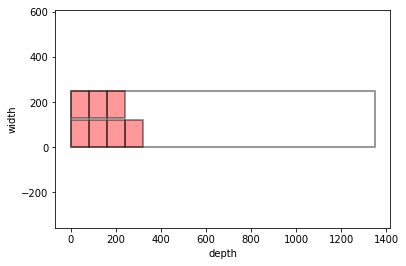

In [23]:
main()